# Used Car Market Analysis
## Exploratory Data Analysis and Visualizations

This notebook analyzes a dataset of used car listings to understand market dynamics, pricing patterns, and key factors influencing vehicle prices.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the data
df = pd.read_csv('/content/drive/MyDrive/sampled_raw_data.csv')

# Create a price in thousands column for easier plotting
df['price_thousands'] = df['price'] / 1000
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)
# Create age column if not already present
if 'Age' not in df.columns:
    df['Age'] = 2024 - df['year']  # Assuming current year is 2024

print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"Missing values:\n{df.isnull().sum()}")
print(f"Data types:\n{df.dtypes}")

Dataset shape: (92380, 19)
Columns: ['region', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'state', 'Age', 'price_thousands']
Missing values:
region                 0
price                  0
year                 254
manufacturer        3797
model               1086
condition          35296
cylinders          37542
fuel                 632
odometer             545
title_status        1837
transmission         433
VIN                35701
drive              28075
size               66405
type               19961
paint_color        27379
state                  0
Age                  254
price_thousands        0
dtype: int64
Data types:
region              object
price              float64
year               float64
manufacturer        object
model               object
condition           object
cylinders           object
fuel                object
odometer           

## 1. Price Distribution Analysis

**What it shows:** The fundamental distribution of vehicle prices in the dataset.
- **Histogram:** Shows how many vehicles fall into different price ranges
- **Boxplot:** Reveals the median, quartiles, and potential outliers

**Key insights to look for:**
- Is the distribution normal, skewed, or bimodal?
- What's the typical price range for most vehicles?
- Are there extreme outliers (very expensive or very cheap vehicles)?
- The boxplot shows the interquartile range (middle 50% of prices)

**Business implications:** Understanding the market's price segmentation helps with inventory planning and pricing strategy.

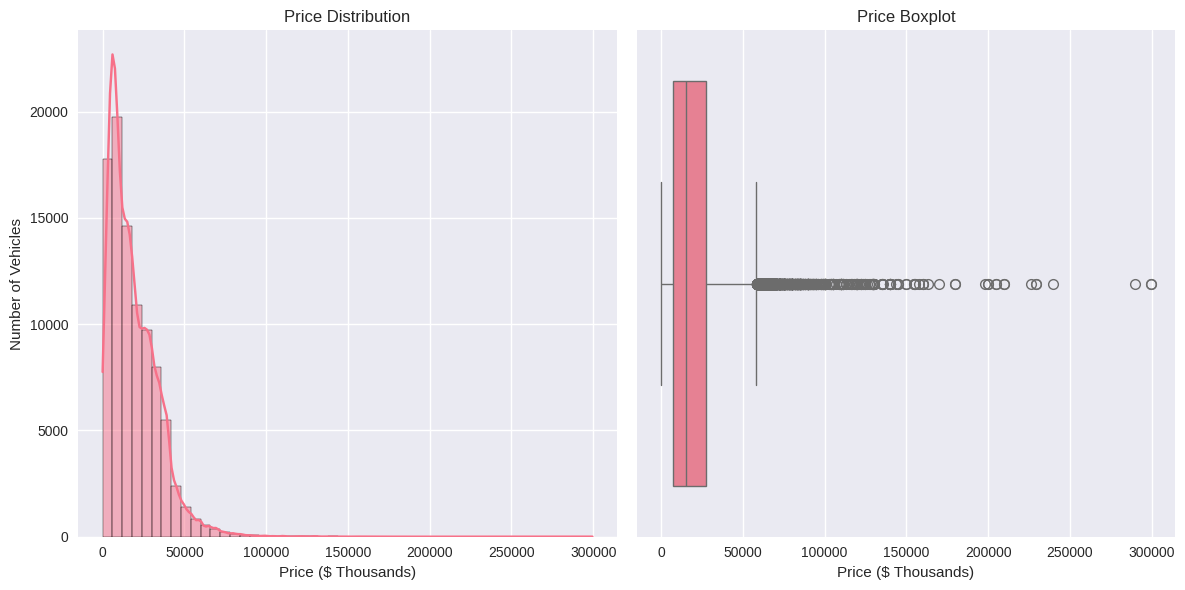

Price Statistics:
Mean price: $18,890
Median price: $15,000
Standard deviation: $15,280
Minimum price: $1
Maximum price: $299,500


In [20]:
# Price distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['price'].dropna(), bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price ($ Thousands)')
plt.ylabel('Number of Vehicles')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['price'].dropna())
plt.title('Price Boxplot')
plt.xlabel('Price ($ Thousands)')
plt.tight_layout()
plt.show()

# Price statistics
print("Price Statistics:")
print(f"Mean price: ${df['price'].mean():,.0f}")
print(f"Median price: ${df['price'].median():,.0f}")
print(f"Standard deviation: ${df['price'].std():,.0f}")
print(f"Minimum price: ${df['price'].min():,.0f}")
print(f"Maximum price: ${df['price'].max():,.0f}")

## 2. Vehicle Age vs Price Analysis

**What it shows:** The relationship between a vehicle's age and its asking price.
- Each point represents one vehicle listing
- X-axis: Vehicle age in years
- Y-axis: Price in thousands of dollars

**Key insights to look for:**
- **Negative correlation:** Typically, older vehicles should be cheaper
- **Depreciation pattern:** How quickly do vehicles lose value?
- **Exceptions:** Are there classic cars that appreciate with age?
- **Data quality:** Check for impossible combinations (very old, very expensive)

**Business implications:** Helps understand depreciation rates and value retention by age.

In [5]:
df.price = np.expm1(df.price)
df.price

,price
0,18997.0
1,51997.0
2,38900.0
3,11750.0
4,7000.0
...,...
92375,3400.0
92376,21928.0
92377,15995.0
92378,21000.0


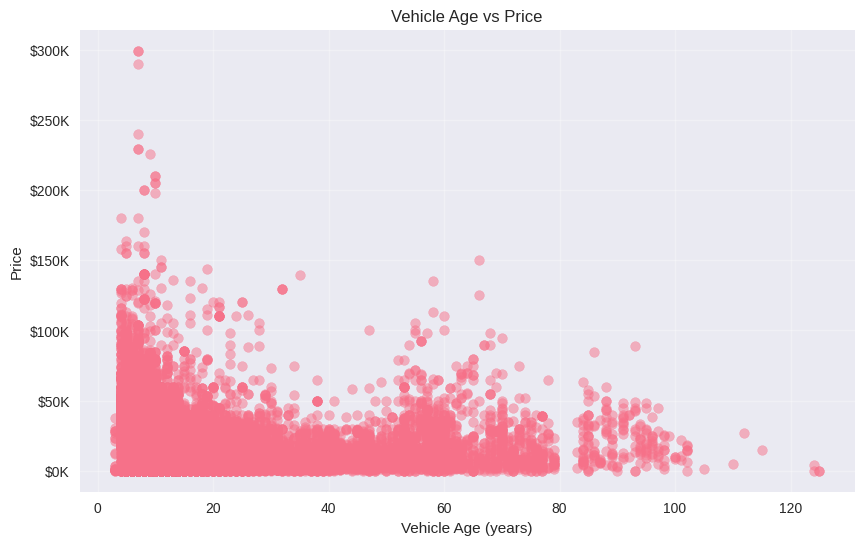

Correlation between Age and Price: -0.331
Interpretation: Negative correlation expected (older cars = lower prices)


In [6]:
# Age vs Price scatter plot with formatter
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['price'], alpha=0.5)
plt.xlabel('Vehicle Age (years)')
plt.ylabel('Price')
plt.title('Vehicle Age vs Price')

# Format y-axis to show thousands with 'K' suffix
formatter = ticker.FuncFormatter(lambda x, p: f'${x/1000:,.0f}K')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(True, alpha=0.3)
plt.show()

# Correlation
correlation = df[['price', 'Age']].corr().iloc[0,1]
print(f"Correlation between Age and Price: {correlation:.3f}")
print("Interpretation: Negative correlation expected (older cars = lower prices)")

## 3. Manufacturer Analysis

**Top Manufacturers by Count:**
- Shows which brands have the most listings in the market
- Reveals market share and popularity
- Indicates which manufacturers are most commonly resold

**Average Price by Manufacturer:**
- Shows which brands command premium prices
- Reveals luxury vs economy brand positioning
- Helps identify value brands (high quality at reasonable prices)

**Business implications:** Inventory selection and competitive positioning strategies.

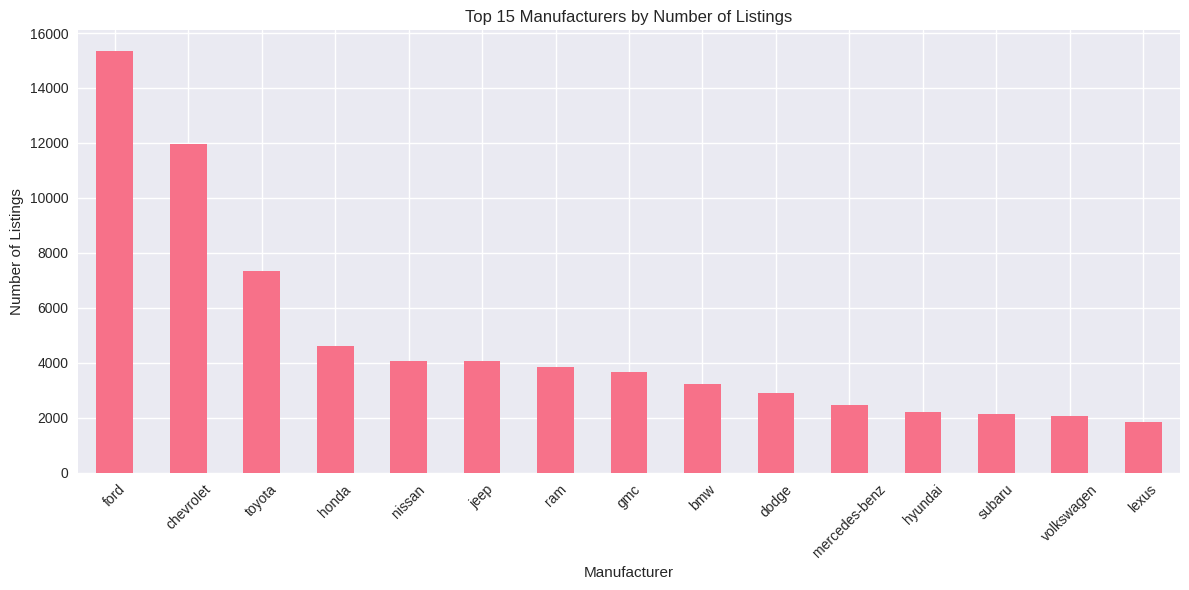

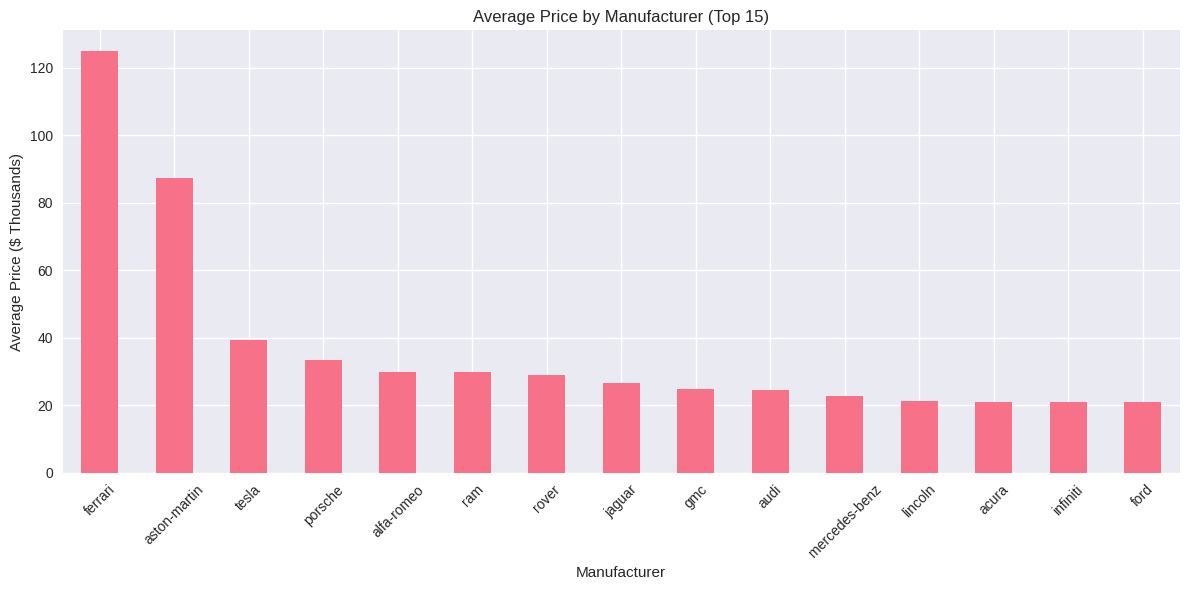

Top 5 Most Expensive Brands:
1. ferrari: $124,906
2. aston-martin: $87,275
3. tesla: $39,511
4. porsche: $33,411
5. alfa-romeo: $29,797


In [7]:
# Top manufacturers by count
plt.figure(figsize=(12, 6))
top_manufacturers = df['manufacturer'].value_counts().head(15)
top_manufacturers.plot(kind='bar')
plt.title('Top 15 Manufacturers by Number of Listings')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average price by manufacturer
plt.figure(figsize=(12, 6))
avg_price_by_manu = df.groupby('manufacturer')['price'].mean().sort_values(ascending=False).head(15)
avg_price_thousands = avg_price_by_manu / 1000
avg_price_thousands.plot(kind='bar')
plt.title('Average Price by Manufacturer (Top 15)')
plt.xlabel('Manufacturer')
plt.ylabel('Average Price ($ Thousands)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Top 5 Most Expensive Brands:")
for i, (brand, price) in enumerate(avg_price_by_manu.head().items(), 1):
    print(f"{i}. {brand}: ${price:,.0f}")

## 4. Vehicle Type Analysis

**Vehicle Type Distribution:**
- Shows market composition by vehicle category
- Reveals consumer preferences
- Indicates which types are most commonly traded

**Average Price by Vehicle Type:**
- Shows which vehicle categories command premium prices
- Reveals price segmentation across different vehicle types
- Helps understand the luxury vs utility vehicle market

**Business implications:** Product mix optimization and category-specific pricing.

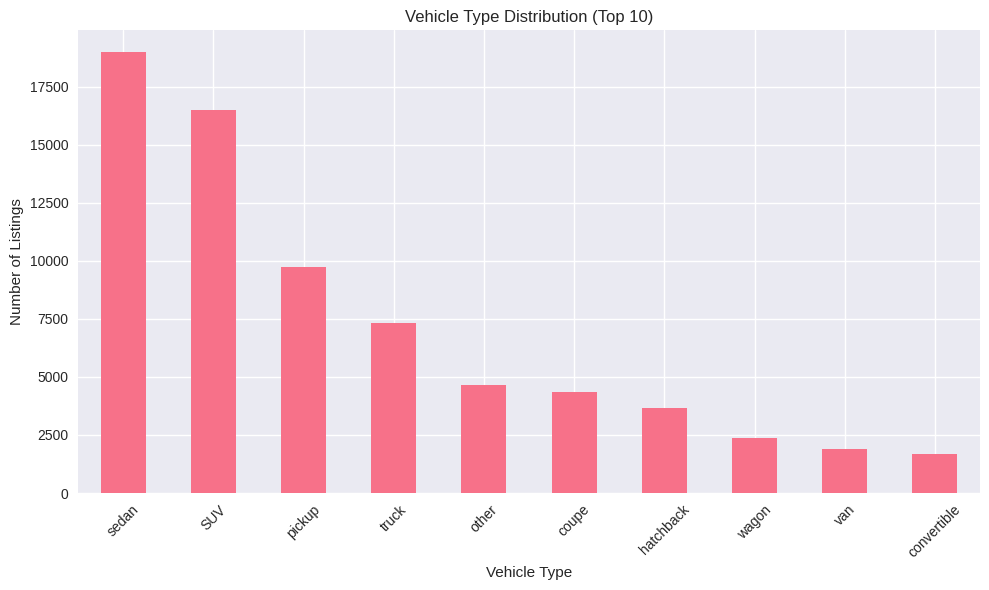

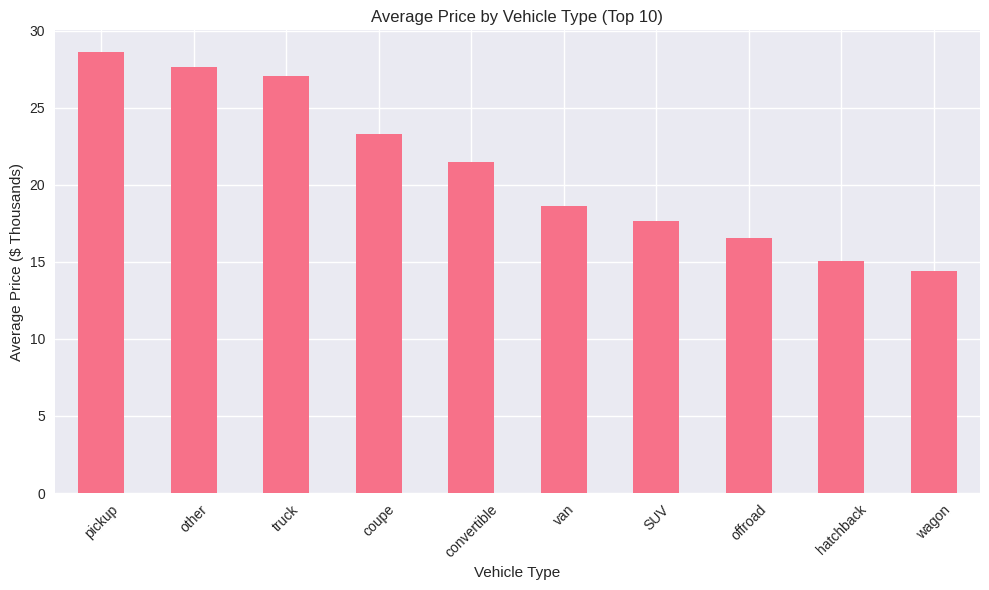

Most Common Vehicle Types:
1. sedan: 18982 listings
2. SUV: 16520 listings
3. pickup: 9733 listings
4. truck: 7316 listings
5. other: 4644 listings


In [8]:
# Vehicle type distribution
plt.figure(figsize=(10, 6))
vehicle_types = df['type'].value_counts().head(10)
vehicle_types.plot(kind='bar')
plt.title('Vehicle Type Distribution (Top 10)')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average price by vehicle type
plt.figure(figsize=(10, 6))
avg_price_by_type = df.groupby('type')['price'].mean().sort_values(ascending=False).head(10)
avg_price_by_type_thousands = avg_price_by_type / 1000
avg_price_by_type_thousands.plot(kind='bar')
plt.title('Average Price by Vehicle Type (Top 10)')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Price ($ Thousands)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Most Common Vehicle Types:")
for i, (vtype, count) in enumerate(vehicle_types.head().items(), 1):
    print(f"{i}. {vtype}: {count} listings")

## 6. Fuel Type Analysis

**Fuel Type Distribution:**
- Shows market share of different fuel technologies
- Reveals adoption rates of alternative fuels
- Indicates consumer preferences and infrastructure availability

**Price by Fuel Type:**
- Shows price premiums/discounts for different fuel types
- May indicate technology costs or consumer preferences
- Reveals the economic viability of alternative fuel vehicles

**Business implications:** Future inventory planning and technology adoption strategies.

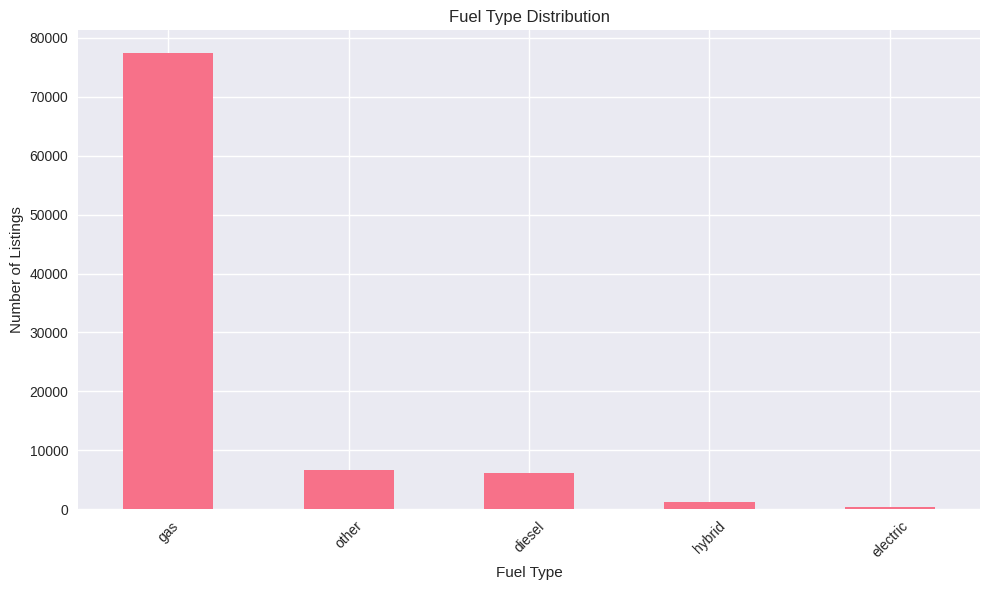

<Figure size 1000x800 with 0 Axes>

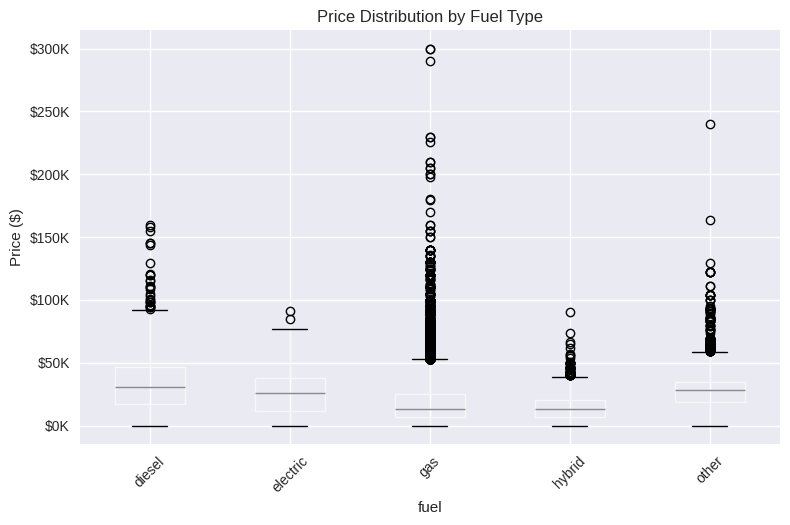

Fuel Type Market Share:
gas: 77360 listings (83.7%)
other: 6609 listings (7.2%)
diesel: 6210 listings (6.7%)
hybrid: 1204 listings (1.3%)
electric: 365 listings (0.4%)


In [9]:
# Fuel type distribution
plt.figure(figsize=(10, 6))
fuel_counts = df['fuel'].value_counts()
fuel_counts.plot(kind='bar')
plt.title('Fuel Type Distribution')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Price by fuel type
plt.figure(figsize=(10, 8))
df.boxplot(column='price', by='fuel', rot=45)
plt.title('Price Distribution by Fuel Type')
plt.ylabel('Price ($)')
plt.suptitle('')

# Format y-axis
formatter = ticker.FuncFormatter(lambda x, p: f'${x/1000:,.0f}K')
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

print("Fuel Type Market Share:")
for fuel, count in fuel_counts.head().items():
    percentage = (count / len(df)) * 100
    print(f"{fuel}: {count} listings ({percentage:.1f}%)")

## 7. Condition Analysis

**Condition Distribution:**
- Shows the quality distribution of vehicles in the market
- Reveals how sellers rate their vehicles' conditions
- May indicate market standards for vehicle grading

**Average Price by Condition:**
- Quantifies the value impact of vehicle condition
- Shows the price premium for better-condition vehicles
- Helps establish pricing guidelines based on condition

**Business implications:** Quality-based pricing strategies and condition assessment standards.

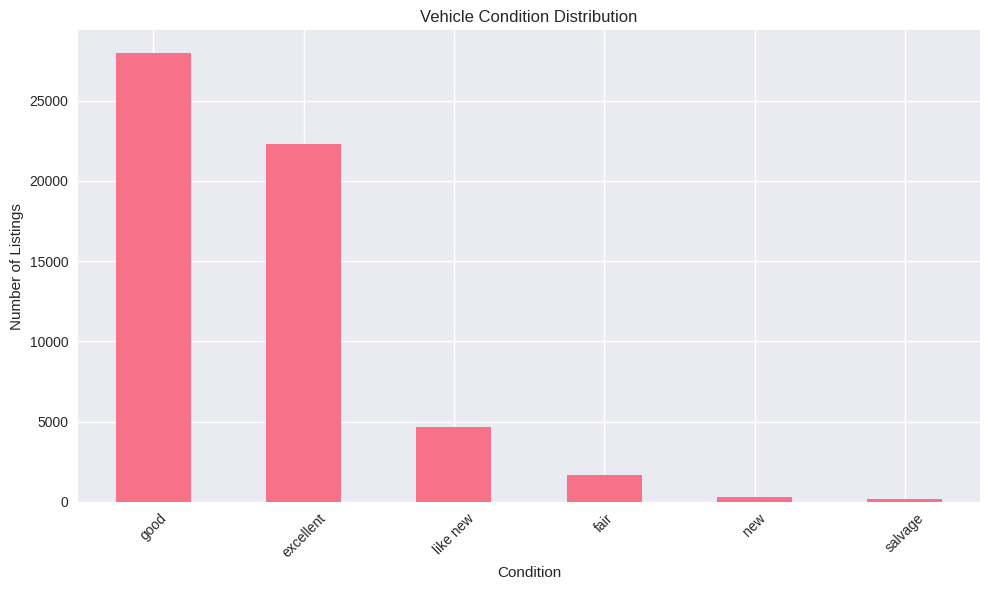

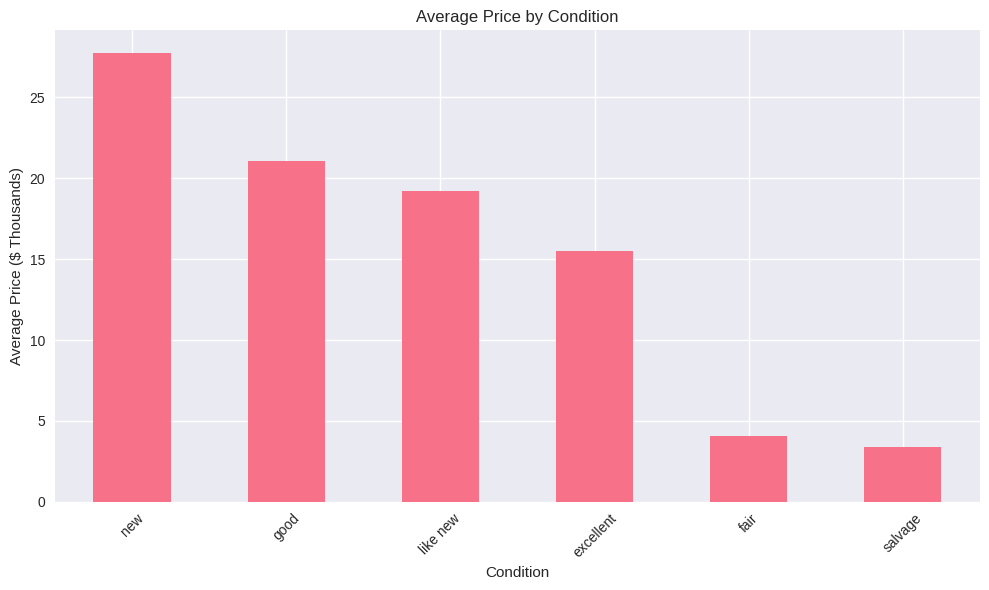

Price Premium by Condition:
new: $27,748
good: $21,072
like new: $19,208
excellent: $15,523
fair: $4,094
salvage: $3,386


In [10]:
# Condition distribution
plt.figure(figsize=(10, 6))
condition_counts = df['condition'].value_counts()
condition_counts.plot(kind='bar')
plt.title('Vehicle Condition Distribution')
plt.xlabel('Condition')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average price by condition
plt.figure(figsize=(10, 6))
avg_price_by_condition = df.groupby('condition')['price'].mean().sort_values(ascending=False)
avg_price_by_condition_thousands = avg_price_by_condition / 1000
avg_price_by_condition_thousands.plot(kind='bar')
plt.title('Average Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Average Price ($ Thousands)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Price Premium by Condition:")
for condition, price in avg_price_by_condition.items():
    print(f"{condition}: ${price:,.0f}")

## 8. Odometer Analysis

**Odometer vs Price Scatter Plot:**
- Shows the relationship between mileage and price
- Typically shows negative correlation (higher mileage = lower price)
- Reveals how mileage affects vehicle valuation

**Odometer Distribution:**
- Shows the typical mileage range of vehicles in the market
- Indicates whether most vehicles are low-mileage or high-mileage
- May reveal market preferences for vehicle usage patterns

**Business implications:** Mileage-based depreciation models and valuation accuracy.

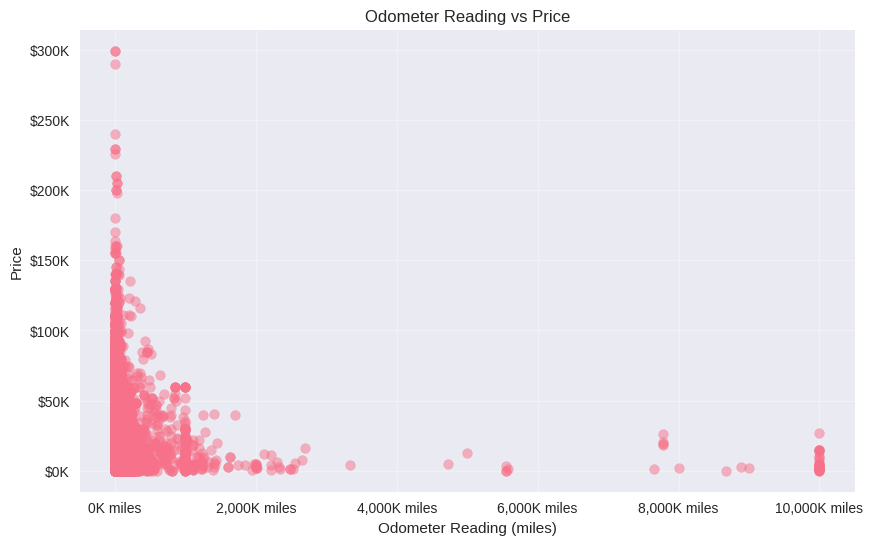

Correlation between Odometer and Price: -0.166
Expected: Negative correlation (higher mileage = lower price)


In [13]:
# Odometer vs Price
plt.figure(figsize=(10, 6))
plt.scatter(df['odometer'], df['price'], alpha=0.5)
plt.xlabel('Odometer Reading (miles)')
plt.ylabel('Price')
plt.title('Odometer Reading vs Price')

# Format both axes
y_formatter = ticker.FuncFormatter(lambda x, p: f'${x/1000:,.0f}K')
x_formatter = ticker.FuncFormatter(lambda x, p: f'{x/1000:,.0f}K miles')
plt.gca().yaxis.set_major_formatter(y_formatter)
plt.gca().xaxis.set_major_formatter(x_formatter)
plt.grid(True, alpha=0.3)
plt.show()


# Correlation
correlation_odo = df[['price', 'odometer']].corr().iloc[0,1]
print(f"Correlation between Odometer and Price: {correlation_odo:.3f}")
print("Expected: Negative correlation (higher mileage = lower price)")

## 9. Transmission Type Analysis

**Transmission Distribution:**
- Shows market share of manual vs automatic transmissions
- Reveals consumer preferences and regional variations
- May indicate skill availability or driving habits

**Price by Transmission Type:**
- Shows price differences between transmission types
- May reveal luxury preferences or technology costs
- Helps understand the economic value of different transmission technologies

**Business implications:** Inventory selection and transmission-specific pricing.

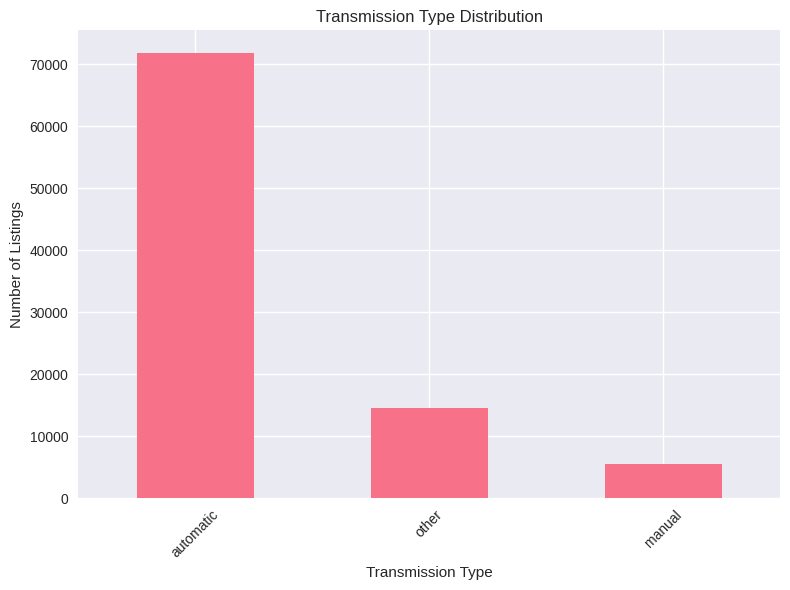

<Figure size 1000x600 with 0 Axes>

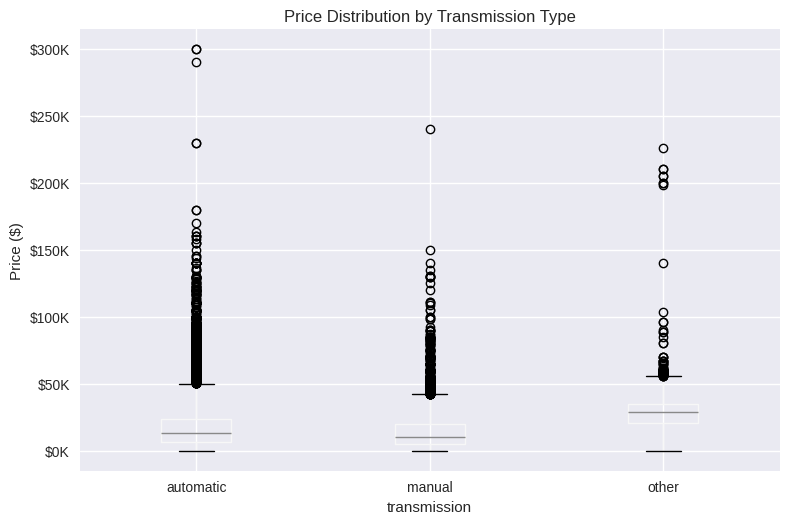

Transmission Type Market Share:
automatic: 71892 listings (77.8%)
other: 14541 listings (15.7%)
manual: 5514 listings (6.0%)


In [14]:
# Transmission distribution
plt.figure(figsize=(8, 6))
transmission_counts = df['transmission'].value_counts()
transmission_counts.plot(kind='bar')
plt.title('Transmission Type Distribution')
plt.xlabel('Transmission Type')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Price by transmission type
plt.figure(figsize=(10, 6))
df.boxplot(column='price', by='transmission')
plt.title('Price Distribution by Transmission Type')
plt.ylabel('Price ($)')
plt.suptitle('')

# Format y-axis
formatter = ticker.FuncFormatter(lambda x, p: f'${x/1000:,.0f}K')
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

print("Transmission Type Market Share:")
for transmission, count in transmission_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{transmission}: {count} listings ({percentage:.1f}%)")

## 10. Correlation Heatmap

**What it shows:** The strength and direction of relationships between numerical variables.
- Values range from -1 (perfect negative correlation) to +1 (perfect positive correlation)
- Dark red: Strong positive correlation
- Dark blue: Strong negative correlation
- Light colors: Weak or no correlation

**Key relationships to examine:**
- **Price vs Year:** Should be positive (newer = more expensive)
- **Price vs Age:** Should be negative (older = cheaper)
- **Price vs Odometer:** Should be negative (higher mileage = cheaper)
- **Year vs Age:** Should be perfectly negative (by definition)

**Business implications:** Identifies which factors most strongly influence pricing.

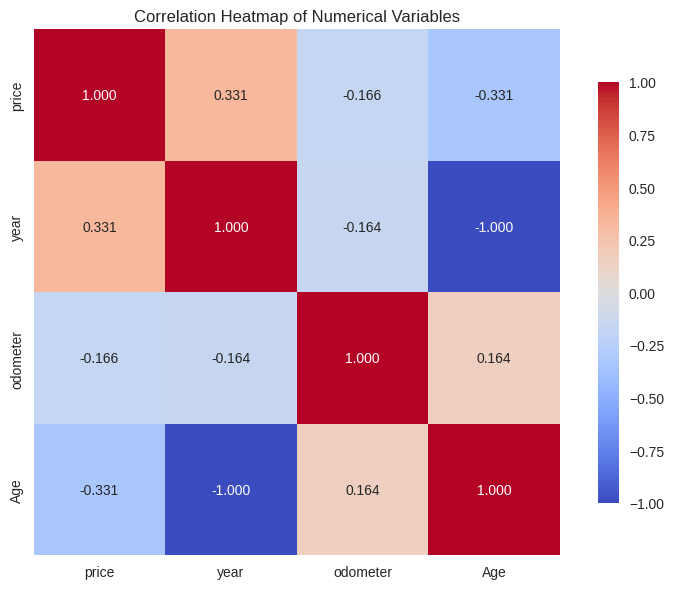

Correlation Interpretation Guide:
1.0 to 0.7: Strong positive correlation
0.7 to 0.3: Moderate positive correlation
0.3 to 0.0: Weak positive correlation
0.0 to -0.3: Weak negative correlation
-0.3 to -0.7: Moderate negative correlation
-0.7 to -1.0: Strong negative correlation


In [15]:
# Select numerical columns for correlation
numerical_cols = ['price', 'year', 'odometer', 'Age']
numerical_df = df[numerical_cols].dropna()
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

print("Correlation Interpretation Guide:")
print("1.0 to 0.7: Strong positive correlation")
print("0.7 to 0.3: Moderate positive correlation")
print("0.3 to 0.0: Weak positive correlation")
print("0.0 to -0.3: Weak negative correlation")
print("-0.3 to -0.7: Moderate negative correlation")
print("-0.7 to -1.0: Strong negative correlation")

## 11. Time Series Analysis (Average Price by Year)

**What it shows:** How average prices have changed over model years.
- Shows vehicle valuation trends across different model years
- Reveals depreciation patterns and value retention
- May show classic car appreciation for older models

**Key insights to look for:**
- Steep vs gradual depreciation curves
- Price plateaus for certain age ranges
- Anomalies for specific model years (particularly good/bad years)
- Classic car appreciation for very old vehicles

**Business implications:** Age-based pricing strategies and inventory age optimization.

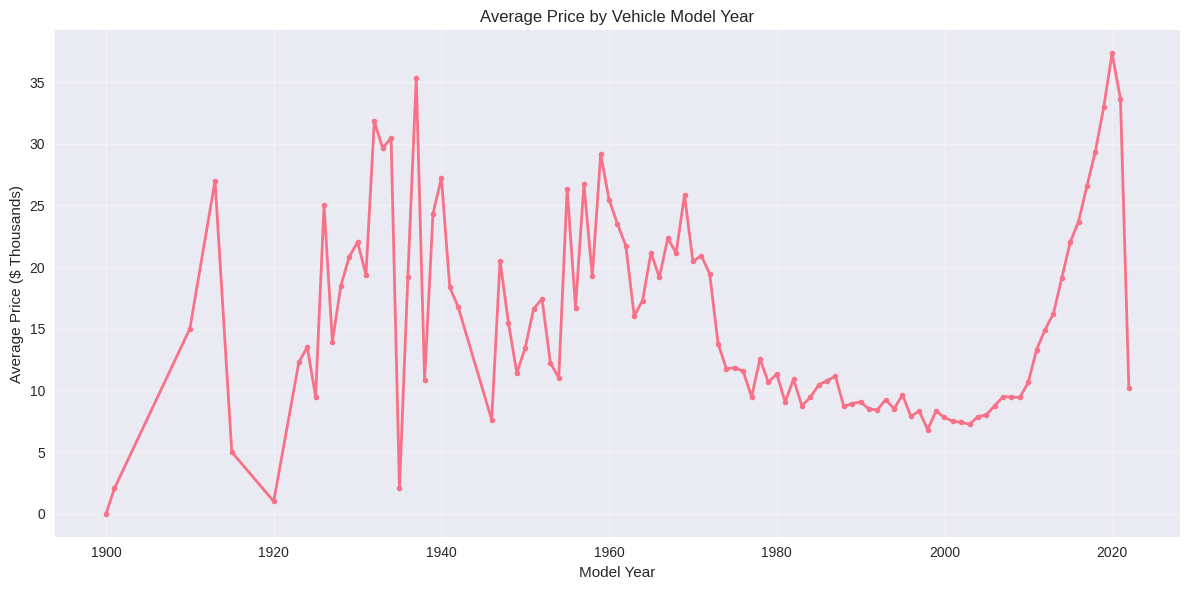

Recent Year Price Trends:
2013.0: $16,227
2014.0: $19,104
2015.0: $22,006
2016.0: $23,690
2017.0: $26,571
2018.0: $29,358
2019.0: $32,948
2020.0: $37,326
2021.0: $33,618
2022.0: $10,199


In [16]:
# Average price by year
plt.figure(figsize=(12, 6))
yearly_avg_price = df.groupby('year')['price'].mean()
yearly_avg_price_thousands = yearly_avg_price / 1000
yearly_avg_price_thousands.plot(kind='line', marker='o', linewidth=2, markersize=4)
plt.title('Average Price by Vehicle Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Price ($ Thousands)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Recent Year Price Trends:")
recent_years = yearly_avg_price.tail(10)
for year, price in recent_years.items():
    print(f"{year}: ${price:,.0f}")

## 12. Advanced Scatter Plot with Regression

**What it shows:** A more sophisticated view of the Age vs Price relationship with a trend line.
- **Scatter points:** Individual vehicle listings
- **Regression line:** The overall trend through the data
- **Confidence interval:** The uncertainty around the trend line

**Key insights:**
- Visualizes the depreciation trend clearly
- Shows how well age predicts price
- Reveals outliers from the general trend

**Business implications:** More accurate depreciation modeling and price prediction.

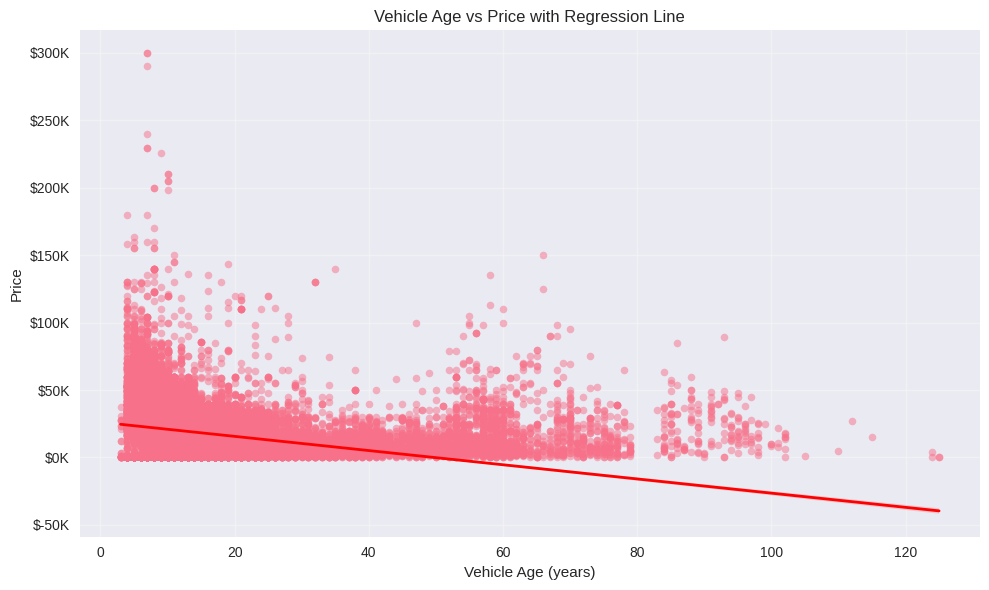

R-squared value: 0.109
This means 10.9% of price variation can be explained by vehicle age


In [17]:
# Age vs Price with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Age', y='price',
            scatter_kws={'alpha':0.5, 's':30},
            line_kws={'color':'red', 'linewidth':2})

# Format y-axis
formatter = ticker.FuncFormatter(lambda x, p: f'${x/1000:,.0f}K')
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Vehicle Age (years)')
plt.ylabel('Price')
plt.title('Vehicle Age vs Price with Regression Line')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate R-squared value
from scipy import stats
age_price_corr = df[['Age', 'price']].dropna()
slope, intercept, r_value, p_value, std_err = stats.linregress(age_price_corr['Age'], age_price_corr['price'])
print(f"R-squared value: {r_value**2:.3f}")
print(f"This means {r_value**2*100:.1f}% of price variation can be explained by vehicle age")

In [18]:
# Final summary statistics
print("=== DATASET SUMMARY ===")
print(f"Total vehicles analyzed: {len(df):,}")
print(f"Date range: {df['year'].min()} - {df['year'].max()}")
print(f"Price range: ${df['price'].min():,} - ${df['price'].max():,}")
print(f"Average vehicle age: {df['Age'].mean():.1f} years")
print(f"Average mileage: {df['odometer'].mean():,.0f} miles")
print(f"Number of manufacturers: {df['manufacturer'].nunique()}")
print(f"Most common manufacturer: {df['manufacturer'].mode().iloc[0]}")

=== DATASET SUMMARY ===
Total vehicles analyzed: 92,380
Date range: 1900.0 - 2022.0
Price range: $1.0 - $299,499.99999999977
Average vehicle age: 14.0 years
Average mileage: 99,043 miles
Number of manufacturers: 41
Most common manufacturer: ford


## Summary of Key Findings

### Major Insights from the Analysis:

1. **Price Distribution:** The market shows the average price of a used car is $18,890
2. **Manufacturer Hierarchy:** Ferrari commands the highest prices
3. **Vehicle Type Preferences:** Sedan is the most common vehicle category
4. **Fuel Type Trends:** Gas options dominates the market